In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
read_depth = []
qual_dist = []
allele_freq = []
pred_effects = {}
#Read file in
vcf = open('var_pred_funct.vcf', 'r')
#iterate through each line
for line in vcf:
    #skip header lines
    if re.match('^#', line):
        continue
    #split each by whitespace into columns
    line_split = line.rstrip().split()
    # evaluate each of 10 strains and append read depth and quality distribution values 
    # to respective lists
    for strain in line_split[9:19]:
        strain_sep = strain.split(':')
        if strain_sep[0] == '.':
            continue
        else:
            read_depth.append(float(strain_sep[2]))
            qual_dist.append(float(strain_sep[1]))
    info = line_split[7].split(';')
    # evaluate each of items an pull allele frequency and add to dictionary 
    # of predicted effects/count
    for inf in line_split[7].split(';'):
        if re.match('^AF=', inf):
            if len(re.split('=|,', inf)) > 2:
                for freq in re.split('=|,', inf)[1:]:
                    allele_freq.append(float(freq))
            else:
                allele_freq.append(float(re.split('=', inf)[1]))
        elif re.match('^ANN=', inf):
            if inf.split('|')[1] != '':
                pred_effects[inf.split('|')[1]] = pred_effects.get(inf.split('|')[1], 0) + 1
vcf.close()

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


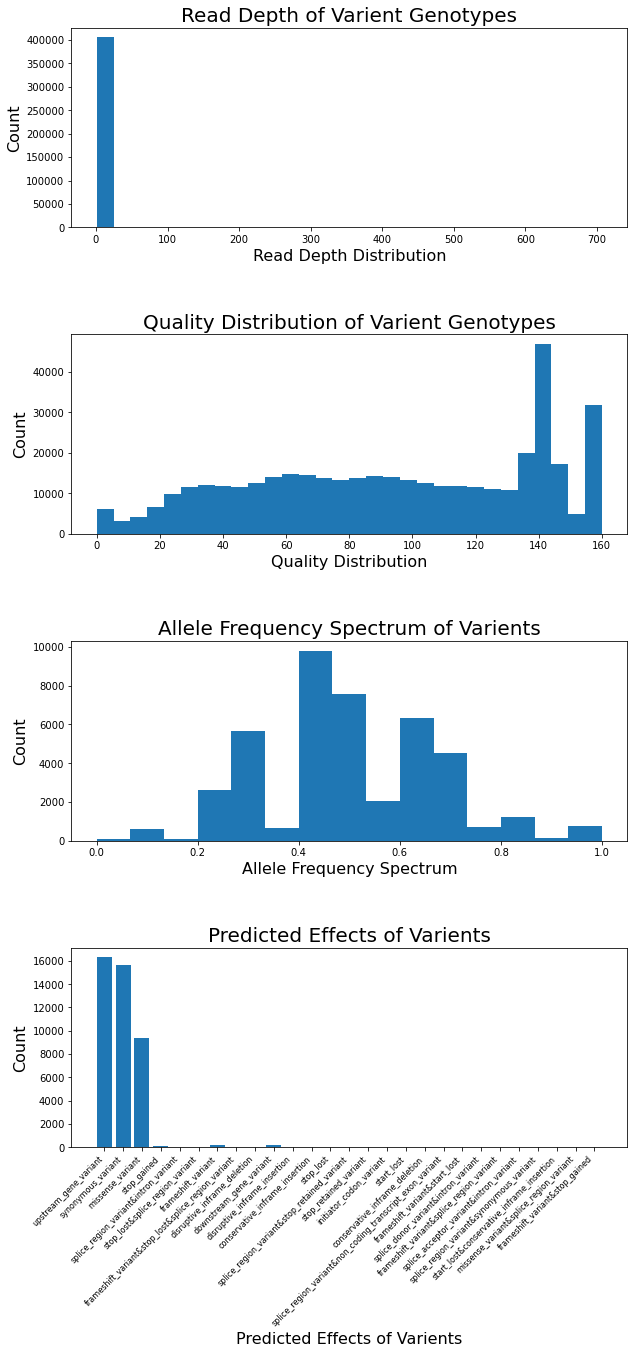

In [3]:
#plot figure
fig, ax = plt.subplots( nrows = 4)
fig.set_figheight(20)
fig.set_figwidth(10)
ax[0].hist(read_depth, bins = 30)
ax[1].hist(qual_dist, bins = 30)
ax[2].hist(allele_freq, bins = 15)
ax[3].bar(*zip(*pred_effects.items()))
ax[3].set_xticklabels(pred_effects.keys(), rotation=45, ha='right', fontsize=8)
ax[0].set_title('Read Depth of Varient Genotypes', fontsize = 20)
ax[1].set_title('Quality Distribution of Varient Genotypes', fontsize = 20)
ax[2].set_title('Allele Frequency Spectrum of Varients', fontsize = 20)
ax[3].set_title('Predicted Effects of Varients', fontsize = 20)
ax[0].set_ylabel('Count', fontsize = 16)
ax[1].set_ylabel('Count', fontsize = 16)
ax[2].set_ylabel('Count', fontsize = 16)
ax[3].set_ylabel('Count', fontsize = 16)
ax[0].set_xlabel('Read Depth Distribution', fontsize = 16)
ax[1].set_xlabel('Quality Distribution', fontsize = 16)
ax[2].set_xlabel('Allele Frequency Spectrum', fontsize = 16)
ax[3].set_xlabel('Predicted Effects of Varients', fontsize = 16)
fig.tight_layout(pad=5.0)
plt.show()